**DETECT POLARITY**

Import libraries

Import data

In [3]:
# Define function to read csv file into dataset
def read_csv_file(file): 
    dataset = pd.read_csv(file,header=0)
    return dataset

# Call funtion on file and keep only relevant columns
#df = read_csv_file(r"C:\Users\nayma\AppData\Local\Programs\Python\Python312\Scripts\thesis\df.csv")
path = r"C:\Users\jmarsal\AppData\Local\anaconda3\Scripts\thesis\df.csv"
df = read_csv_file(path)
df = df[['post_id','comment_id','comment_text']]

Define program to detect polarity with VADER

In [4]:
# Rename for simplicity
sia = SentimentIntensityAnalyzer()

# Define function to detect polarity
def det_sentiment(text, analyser,polarity):
    sentiment_score = analyser.polarity_scores(text)
    return sentiment_score[polarity]

# Define function for sentiment scores
def det_sentiment_score(df,column):
    df['pos'] = df[column].astype(str).apply(lambda x: det_sentiment(x,sia,'pos'))
    df['neg'] = df[column].astype(str).apply(lambda x: det_sentiment(x,sia,'neg'))
    df['neu'] = df[column].astype(str).apply(lambda x: det_sentiment(x,sia,'neu'))
    df['compound'] = df[column].astype(str).apply(lambda x: det_sentiment(x,sia,'compound'))
    return df

**Detect polarity score**

In [5]:
df = det_sentiment_score(df,'comment_text')

Label each comment with its broadened polarity label depending on polarity score

In [5]:
# Define function to label each comment
def broad_polarity(column):
    polarity = []
    for compound in column:
        conditions = [
            (compound < -0.5),
            (compound >= -0.5) & (compound < 0),
            (compound == 0),
            (compound > 0) & (compound <= 0.5),
            (compound > 0.5)]
        choices = ['strongly negative', 'negative', 'neutral', 'positive','strongly positive']
        pol = np.select(conditions,choices)
        polarity.append(pol)
    return polarity


df['polarity'] = broad_polarity(df['compound'])

Saving random sample of 200 to compare my own labels with VADER labels

In [6]:
#df_label = df.sample(n=200)
#df_label.to_csv(r"C:\Users\nayma\AppData\Local\Programs\Python\Python312\Scripts\thesis\df_first_label.csv", index=False) 
#df_manual_label = df_label[['post_id','comment_id','comment_text']]
#df_manual_label.to_csv(r"C:\Users\nayma\AppData\Local\Programs\Python\Python312\Scripts\thesis\df_manual_label.csv", index=False) 

**Changes**

In [7]:
# Keep only relevant columns
df = df[['post_id','comment_id','comment_text']]

In [8]:
# Most common words and emojis check polarity score
df_else_comm = df['comment_text'].str.lower()
most_common = Counter(" ".join(df_else_comm).split()).most_common(100)

Heart issue

In [9]:
# Change neutral hearts for positive
hearts = {'❤️':'❤', '❤\u200d':'❤'}

for key, value in hearts.items():
    df.comment_text = df.comment_text.str.replace(key, value)

**Updated VADER score for 2024 Instagram comments**

Detect polarity score with VADER updated

In [10]:
df = det_sentiment_score(df,'comment_text')

Label each comment with its polarity label depending on polarity score

In [11]:
# Label broadened polarity
df['polarity'] = broad_polarity(df['compound'])

Saving random sample of 200 to compare my own labels with VADER labels

In [12]:
#df_label2 = df.sample(n=200)
#df_label2.to_csv(r"C:\Users\nayma\AppData\Local\Programs\Python\Python312\Scripts\thesis\df_first_label2.csv", index=False) 
#df_manual_label2 = df_label2[['post_id','comment_id','comment_text']]
#df_manual_label2.to_csv(r"C:\Users\nayma\AppData\Local\Programs\Python\Python312\Scripts\thesis\df_manual_label2.csv", index=False) 

Evaluating polarity score results

In [13]:
df.polarity.value_counts()

polarity
strongly positive    14068
neutral               4945
positive              3718
negative              1322
strongly negative      965
Name: count, dtype: int64

Save dataset to work on further notebooks

In [14]:
df.to_csv(r"C:\Users\nayma\AppData\Local\Programs\Python\Python312\Scripts\thesis\df_polarity.csv", index=False) 

FROM HERE DISCARD

In [15]:
df[df['polarity'] == 'positive'].head(20)

,post_id,comment_id,comment_text,pos,neg,neu,compound,polarity
1,A1,10004,nice,1.000,0.000,0.000,0.4215,positive
2,A1,10005,LIKE BACK,0.714,0.000,0.286,0.3612,positive
8,A1,10016,👏,0.750,0.000,0.250,0.4588,positive
30,A1,10061,exciting,1.000,0.000,0.000,0.4939,positive
35,A1,10075,😍,0.500,0.000,0.500,0.4588,positive
37,A1,10077,what was that pose lol,0.412,0.000,0.588,0.4215,positive
38,A1,10079,F I R S T 🔥,0.359,0.000,0.641,0.4215,positive
46,A1,10098,nice pick!,0.756,0.000,0.244,0.4753,positive
50,A1,10104,like back,0.714,0.000,0.286,0.3612,positive
58,A1,10114,I need job please,0.434,0.000,0.566,0.3182,positive


**Wordcloud**

FOR HERE ON IN RESULTS BETTER

modify this for thesis so not plagiarism

In [16]:
from nltk.corpus import stopwords
stopcorpus: typing.List = stopwords.words('english')

In [17]:
def style_text(text:str):
    # Convert to lowercase
    return text.lower()

def remove_words(text_data:str,list_of_words_to_remove: typing.List):
    # Remove all words as specified in a custom list of words
    return [item for item in text_data if item not in list_of_words_to_remove]

def collapse_list_to_string(string_list):
    # This is to join back together the text data into a single string
    return ' '.join(string_list)

def remove_apostrophes(text):
    # Remove any apostrophes as these are irrelavent in our word cloud
    text = text.replace("'", "")
    text = text.replace('"', "")
    text = text.replace('`', "")
    return text

df['comment_clean'] = df['comment_text'].astype(str).apply(style_text)
df['comment_clean'] = df['comment_clean'].astype(str).apply(lambda x: remove_words(x.split(),stopcorpus))
df['comment_clean'] = df['comment_clean'].apply(collapse_list_to_string)
df['comment_clean'] = df['comment_clean'].apply(remove_apostrophes)

display(df['comment_clean'].head(40))

0                                              🍸 firsts
1                                                  nice
2                                             like back
3                                           ❤ ️ ❤ ️ ❤ ️
4                                                     🫣
5                                                   ❤ ️
6                                         first comment
7                                         lbinstantly 🤍
8                                                     👏
9                                              love 😍 😍
10                                                ❤ ️ 👏
11                                     shoes terrible 😢
12                                      lbinstantly 🫶 🏻
13                                             🌠 firsts
14               need ballet teacher photo shooting ❤ ️
15                                              comment
16                                 beautiful red ❤ ️‍ 🔥
17                              🔥 🔥 🔥 ❤ ️ ❤ ️ ❤ 

In [18]:
#lemmatize cleaned text, stem words
word_tokenize = nltk.tokenize.WhitespaceTokenizer()
lemmatize = nltk.stem.WordNetLemmatizer()

#define function
def lemmatize_comment(comment):
    return [lemmatize.lemmatize(word) for word in word_tokenize.tokenize(comment)]

df['comment_lemmatized'] = df['comment_clean'].astype(str).apply(lemmatize_comment)

df['comment_lemmatized'] = df['comment_lemmatized'].apply(collapse_list_to_string)

df['comment_lemmatized'].head(40)

0                                               🍸 first
1                                                  nice
2                                             like back
3                                           ❤ ️ ❤ ️ ❤ ️
4                                                     🫣
5                                                   ❤ ️
6                                         first comment
7                                         lbinstantly 🤍
8                                                     👏
9                                              love 😍 😍
10                                                ❤ ️ 👏
11                                      shoe terrible 😢
12                                      lbinstantly 🫶 🏻
13                                              🌠 first
14               need ballet teacher photo shooting ❤ ️
15                                              comment
16                                 beautiful red ❤ ️‍ 🔥
17                              🔥 🔥 🔥 ❤ ️ ❤ ️ ❤ 

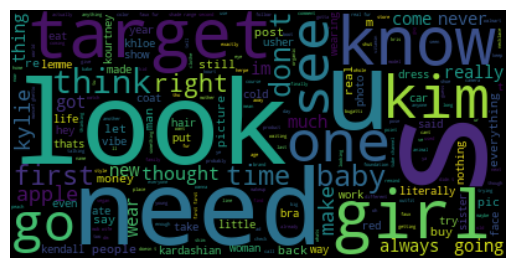

In [19]:
def wordcloud_plot(series,output_filename='wordcloud'):
    from wordcloud import WordCloud
    wordcloud = WordCloud().generate(' '.join(series.astype(str)))
    wordcloud.to_file(output_filename + '.png')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

wordcloud_plot(df[df.polarity == 'neutral']['comment_lemmatized'],'overall-wordcloud')

**Statistics**

In [20]:


kylie = df.loc[df.post_id.str.contains('[A]'), :]
kylie.tail()

,post_id,comment_id,comment_text,pos,neg,neu,compound,polarity,comment_clean,comment_lemmatized
12832,C3A,41743,omg i’m so early hiii khloeeeeeee,0.206,0.0,0.794,0.0772,positive,omg i’m early hiii khloeeeeeee,omg i’m early hiii khloeeeeeee
12833,C3A,41744,my mother ❤ ️ ❤ ️ 🔥 🔥 🔥,0.737,0.0,0.263,0.9501,strongly positive,mother ❤ ️ ❤ ️ 🔥 🔥 🔥,mother ❤ ️ ❤ ️ 🔥 🔥 🔥
12834,C3A,41749,💎 💎 💎 💎 💎 💎 💎 💎 💎 👑 💙,0.288,0.0,0.712,0.8271,strongly positive,💎 💎 💎 💎 💎 💎 💎 💎 💎 👑 💙,💎 💎 💎 💎 💎 💎 💎 💎 💎 👑 💙
12835,C3A,41750,you are a beautiful and attractive girl 👏 👏 ...,0.658,0.0,0.342,0.9690,strongly positive,beautiful attractive girl 👏 👏 ❤ ️ ❤ ️,beautiful attractive girl 👏 👏 ❤ ️ ❤ ️
12836,C3A,41751,I'm in love with you koko 🔥 👏,0.625,0.0,0.375,0.8750,strongly positive,im love koko 🔥 👏,im love koko 🔥 👏


In [21]:
df.dtypes

post_id                object
comment_id              int64
comment_text           object
pos                   float64
neg                   float64
neu                   float64
compound              float64
polarity               object
comment_clean          object
comment_lemmatized     object
dtype: object

C:\Users\nayma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127864 (\N{COCKTAIL GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nayma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129763 (\N{FACE WITH PEEKING EYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nayma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nayma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nayma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 

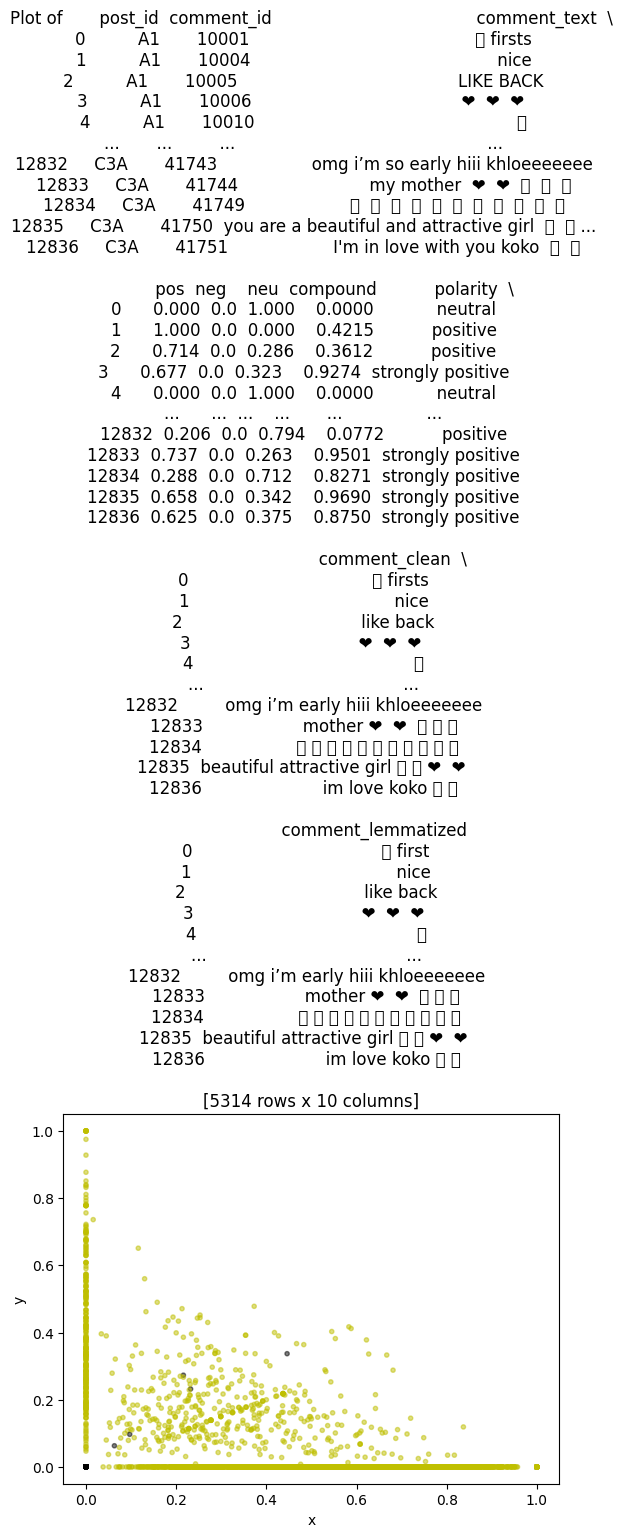

C:\Users\nayma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nayma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128147 (\N{BEATING HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nayma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129475 (\N{BEVERAGE BOX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nayma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128148 (\N{BROKEN HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nayma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 10024 (

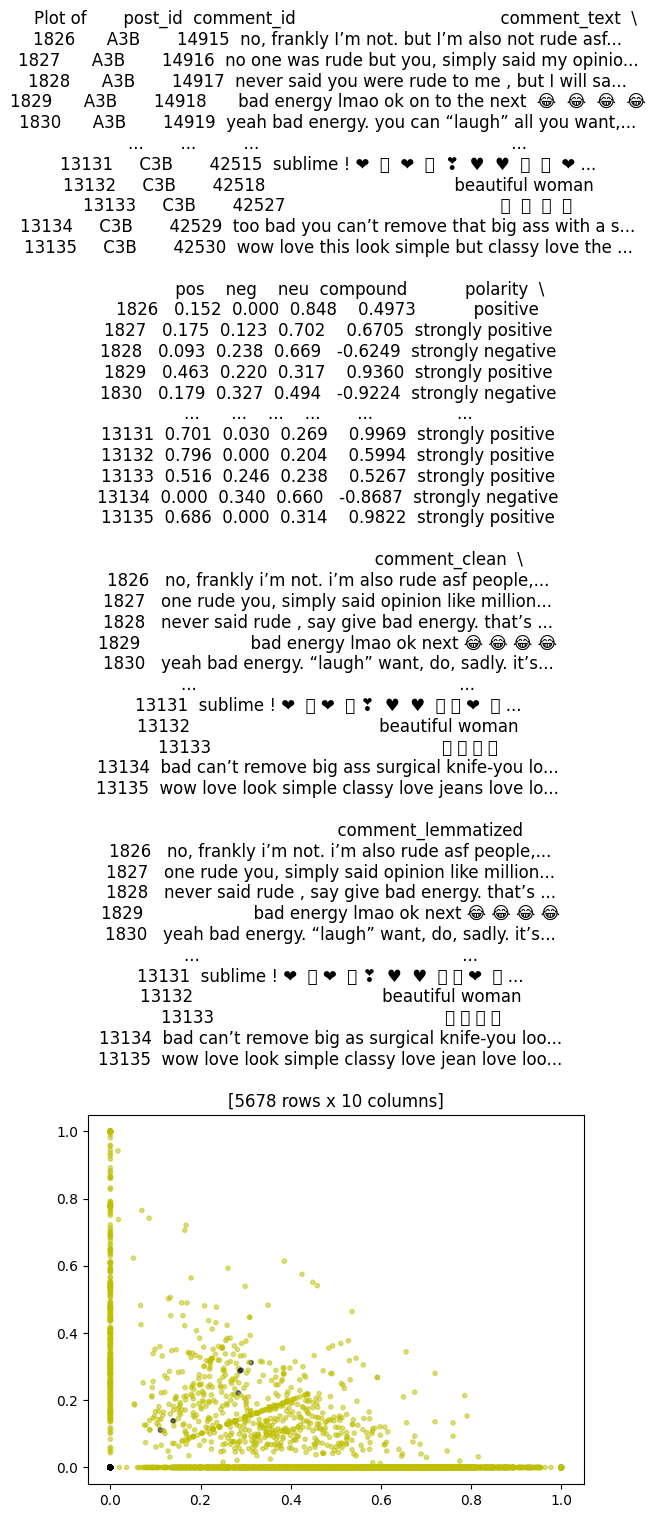

C:\Users\nayma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nayma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129335 (\N{SHRUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nayma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nayma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127473 (\N{REGIONAL INDICATOR SYMBOL LETTER L}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nayma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtool

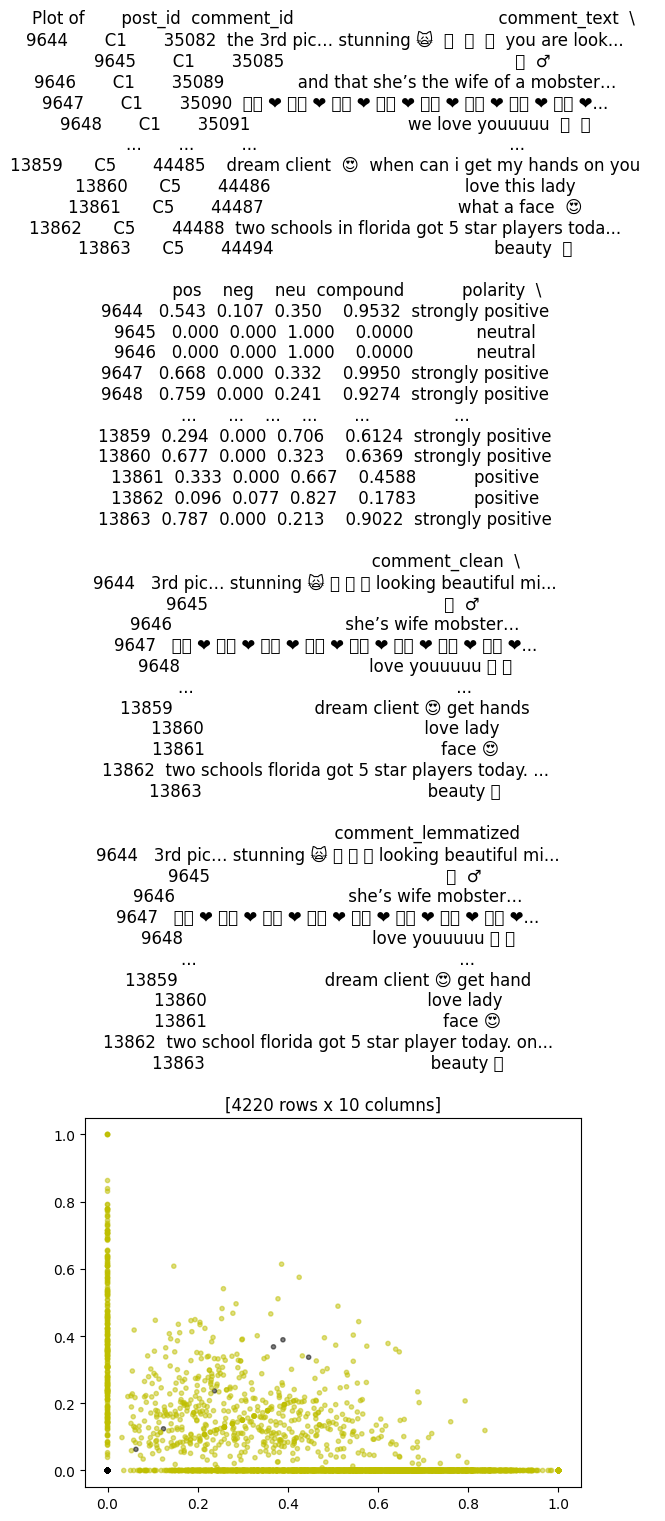

C:\Users\nayma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nayma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128580 (\N{FACE WITH ROLLING EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nayma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nayma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


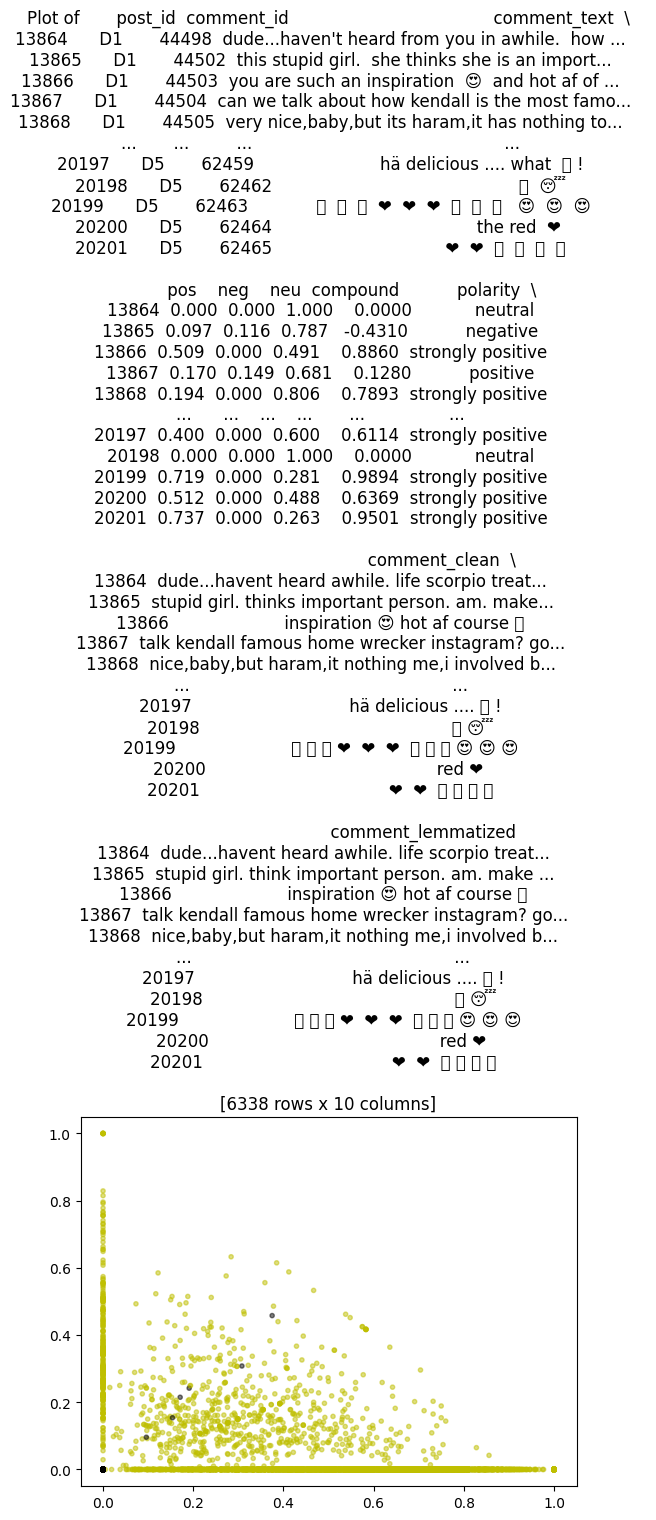

C:\Users\nayma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


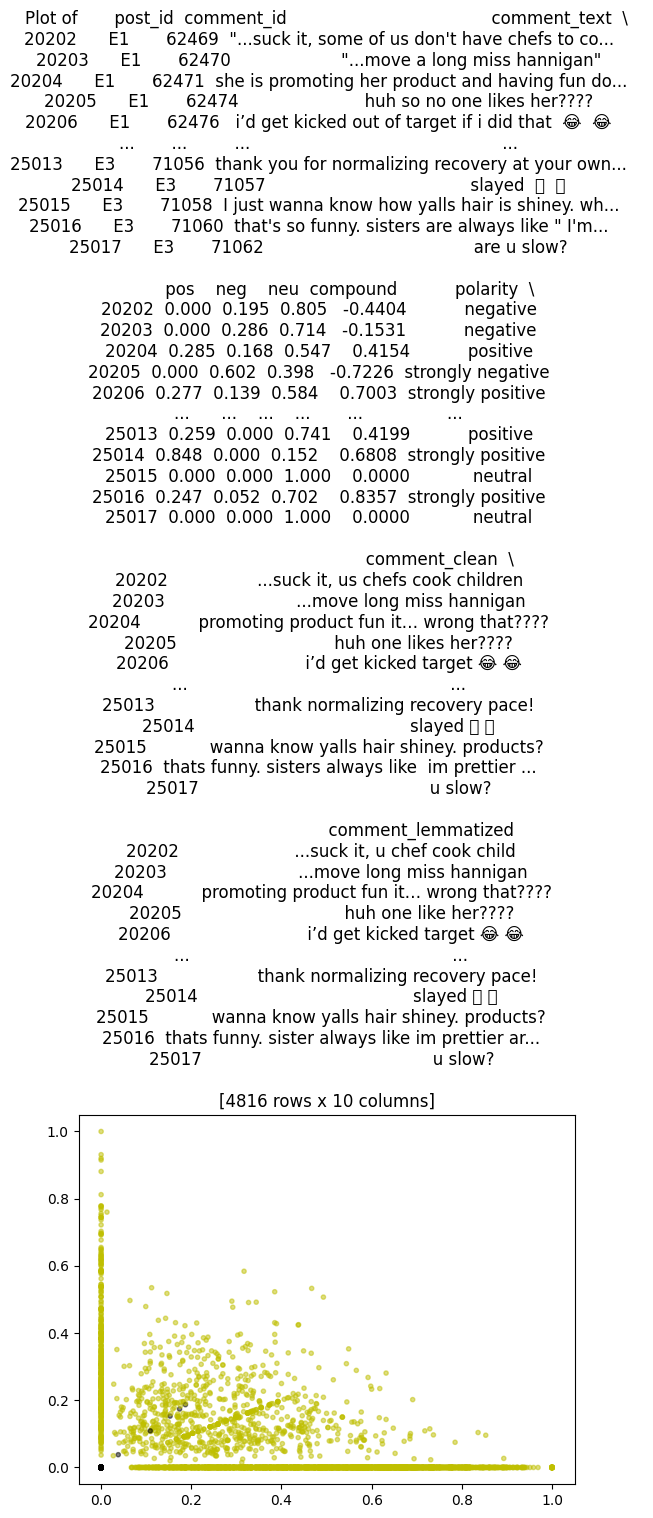

In [22]:
# Create data

import numpy as np
#compact this shitt like in dictionary
kylie = df.loc[df.post_id.str.contains('[A]'), :]
kim = df.loc[df.post_id.str.contains('[B]'), :]
khloe = df.loc[df.post_id.str.contains('[C]'), :]
kendall = df.loc[df.post_id.str.contains('[D]'), :]
kourtney = df.loc[df.post_id.str.contains('[E]'), :]

kj = [kylie, kim, khloe, kendall, kourtney]

N = 500
area = np.pi*3
plt.xlabel('x')
plt.ylabel('y')

for girl in kj:
    tit = f'Plot of {girl}'
    x = girl['pos']
    y = girl['neg']
    colors = np.where(girl["compound"] ==0,'k','y')

    # Plot
    plt.scatter(x, y, s=area, c=colors, alpha=0.5)
    plt.title(tit)
    plt.show()